# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [4]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = html_soup.find('table')
rows = table.find_all('tr')
for row in rows:
    print(row)


<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>


In [6]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]:
    # Extract the cells of data from the row
    cells = row.find_all('td')
    
    # Extract the text from each cell and add it to a list
    row_data = [cell.text.strip() for cell in cells]
    
    # Add the list of data to the overall list of data
    data.append(row_data)
    
# Print the data
data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [8]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
# Examine data type of each column
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype('int64')
mars_df['ls'] = mars_df['ls'].astype('int64')
mars_df['month'] = mars_df['month'].astype('int64')
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
month_counts = mars_df['month'].value_counts().sort_index()
print(month_counts)

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64


In [13]:
# 2. How many Martian days' worth of data are there?
num_sols = mars_df.shape[0]
num_sols

1867

In [14]:
# 3. What is the average low temperature by month?
mars_df.groupby('month')['min_temp'].mean()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

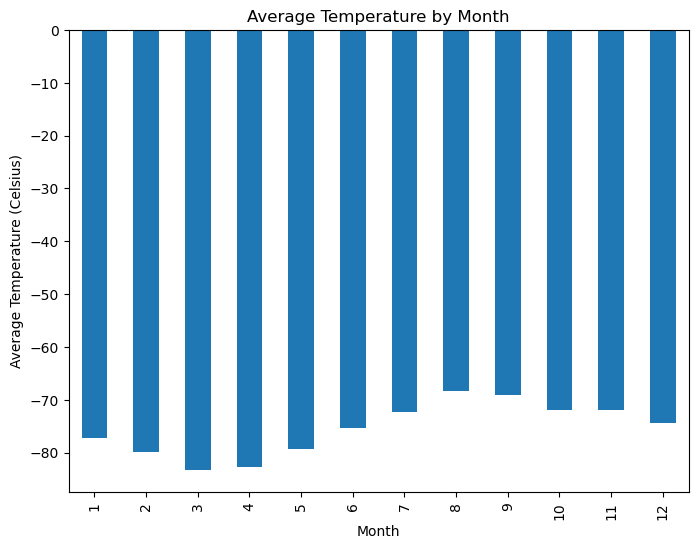

In [15]:
# Plot the average temperature by month

# Group the data by month and calculate the average minimum temperature
temp_by_month = mars_df.groupby('month')['min_temp'].mean()

# Plot the average temperature by month
temp_by_month.plot(kind='bar', figsize=(8,6))
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (Celsius)')
plt.show()

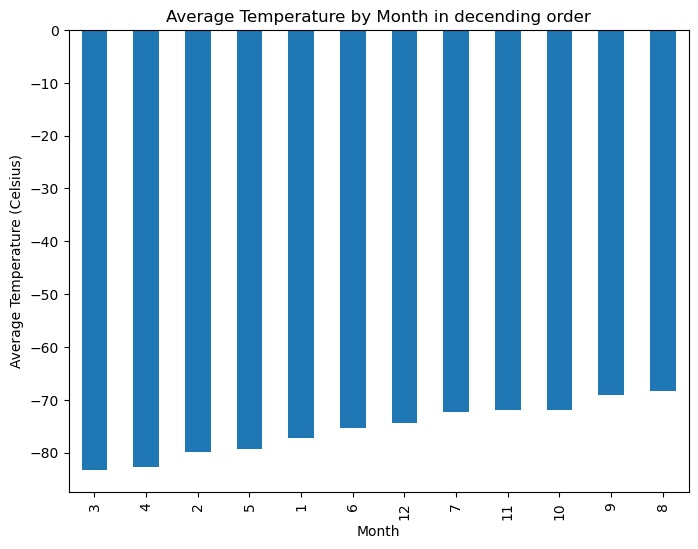

In [16]:
# Plot the average temperature by month in decending order 

temp_by_month.sort_values().plot(kind='bar', figsize=(8,6))
plt.title('Average Temperature by Month in decending order')
plt.xlabel('Month')
plt.ylabel('Average Temperature (Celsius)')
plt.show()


In [17]:
coldest_month = temp_by_month.idxmin()
hottest_month = temp_by_month.idxmax()

print(f"The coldest month is {coldest_month}")
print(f"The hottest month is {hottest_month}")

The coldest month is 3
The hottest month is 8


In [18]:
# 4. Average pressure by Martian month
# Group the DataFrame by month and calculate the mean of pressure for each month

pressure_month = mars_df.groupby('month')['pressure'].mean()
pressure_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [19]:
# Find the month with the lowest atmospheric pressure
lowest_pressure_month = pressure_month.idxmin()
lowest_pressure_month

6

In [20]:
# Find the month with the highest atmospheric pressure
highest_pressure_month = pressure_month.idxmax()
highest_pressure_month

9

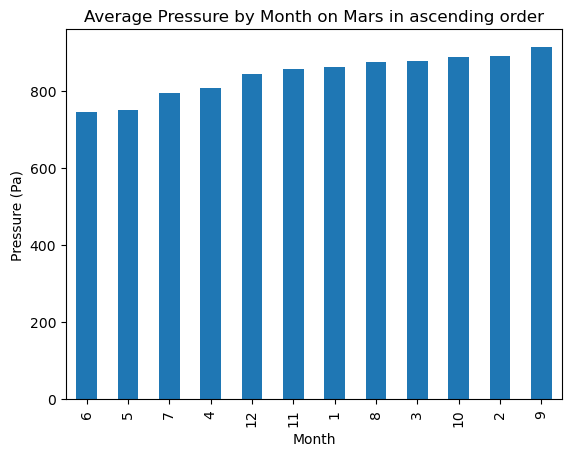

In [21]:
# Plot the average pressure by month

pressure_month.sort_values().plot(kind='bar')
plt.title('Average Pressure by Month on Mars in ascending order')
plt.xlabel('Month')
plt.ylabel('Pressure (Pa)')
plt.show()

In [22]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Calculate the total number of Earth days in the data
earth_days = (mars_df['terrestrial_date'].max() - mars_df['terrestrial_date'].min()).days

# Calculate the number of Martian years in the data
martian_years = (mars_df['sol'].max() - mars_df['sol'].min()) / 668.6

# Calculate the number of Earth days in a Martian year
earth_days_in_martian_year = earth_days / martian_years

print(earth_days_in_martian_year)

686.955058464667


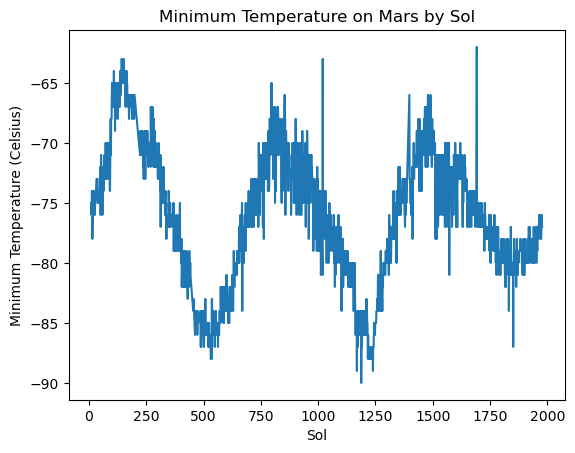

In [23]:
# Convert sol to numeric data type
mars_df['sol'] = pd.to_numeric(mars_df['sol'])

# Convert min_temp to numeric data type
mars_df['min_temp'] = pd.to_numeric(mars_df['min_temp'])

# Plot the minimum temperature against sol
plt.plot(mars_df['sol'], mars_df['min_temp'])

# Add labels and title
plt.xlabel('Sol')
plt.ylabel('Minimum Temperature (Celsius)')
plt.title('Minimum Temperature on Mars by Sol')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
mars_df.to_csv('mars_data.csv', index=False)

In [25]:
browser.quit()